In [22]:
!pip install torchviz

In [41]:
import torch
import tensorflow as tf
import tensorflow_probability as tfp
import math

import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph
from IPython.display import Image

In [20]:
!ls -ltr

total 52
-rwxr-xr-x 1 root root 6847 Dec  3 09:52 README.md
drwxr-xr-x 2 root root 4096 Dec  3 09:52 assets
drwxr-xr-x 2 root root 4096 Dec  3 09:52 tests
-rw-r--r-- 1 root root  421 Dec  3 09:52 setup.py
drwxr-xr-x 2 root root 4096 Dec  3 09:52 examples
drwxr-xr-x 4 root root 4096 Dec  3 09:53 build
drwxr-xr-x 2 root root 4096 Dec  3 09:53 autodiff.egg-info
drwxr-xr-x 5 root root 4096 Dec  3 09:54 autodiff
-rw-r--r-- 1 root root 8334 Dec  3 09:55 comp_graph.pdf
drwxr-xr-x 2 root root 4096 Dec  3 10:51 logs


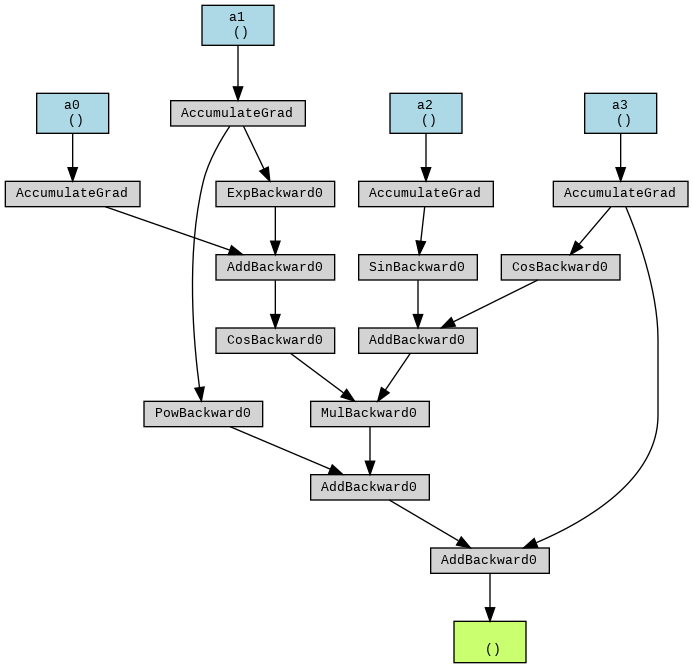

In [42]:
import torch
from torchviz import make_dot

# Define the computation
a0 = torch.tensor(1.0, requires_grad=True)
a1 = torch.tensor(2.0, requires_grad=True)
a2 = torch.tensor(3.0, requires_grad=True)
a3 = torch.tensor(4.0, requires_grad=True)

exp_a1 = torch.exp(a1)
sum_a0_exp = a0 + exp_a1
cos_sum = torch.cos(sum_a0_exp)
sin_a2 = torch.sin(a2)
cos_a3 = torch.cos(a3)
sum_trig = sin_a2 + cos_a3
prod_cos_trig = cos_sum * sum_trig
a1_power = torch.pow(a1, 1.5)
z = prod_cos_trig + a1_power + a3

# Visualize the computational graph
dot = make_dot(z, params={"a0": a0, "a1": a1, "a2": a2, "a3": a3})
dot.render("graph", format="png", cleanup=True)
Image('graph.png')  # Display the image
#dot.view()


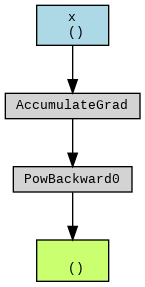

In [43]:
import torch
from torchviz import make_dot

# Define the computation
x = torch.tensor(3.0, requires_grad=True)  # Define x with gradient tracking
z = x**2  # Compute z = x^2

# Visualize the computational graph
dot = make_dot(z, params={"x": x})
dot.render("graph_x_squared", format="png", cleanup=True)  # Save the graph as a PNG
Image('graph_x_squared.png')  # Display the image
#dot.view()  # Open the graph for viewing


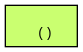

In [44]:
import torch
from torchviz import make_dot

# Define the computation without gradient tracking
x = torch.tensor(5.0)  # Input tensor
y = x + 1  # Perform the computation y = x + 1

# Create a dummy node for visualization (torchviz expects tensors with `requires_grad`)
dummy = torch.tensor(0.0, requires_grad=False) + y  # Trick torchviz into visualizing the graph

# Visualize the computational graph
dot = make_dot(dummy, params={"x": x})
dot.render("graph_x_plus_1", format="png", cleanup=True)  # Save as PNG
Image('graph_x_plus_1.png')  # Display the image

In [10]:
# Define the Black-Scholes formula as a function
def black_scholes(S, K, r, sigma, T, option_type="call"):
    """
    S: Current stock price
    K: Strike price
    r: Risk-free rate
    sigma: Volatility
    T: Time to maturity
    option_type: "call" or "put"
    """
    d1 = (tf.math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * tf.sqrt(T))
    d2 = d1 - sigma * tf.sqrt(T)

    if option_type == "call":
        price = S * tfp.distributions.Normal(0.0, 1.0).cdf(d1) - K * tf.exp(-r * T) * tfp.distributions.Normal(0.0, 1.0).cdf(d2)
    elif option_type == "put":
        price = K * tf.exp(-r * T) * tfp.distributions.Normal(0.0, 1.0).cdf(-d2) - S * tfp.distributions.Normal(0.0, 1.0).cdf(-d1)
    else:
        raise ValueError("Invalid option_type. Choose 'call' or 'put'.")
    return price

# Parameters
S = tf.Variable(100.0)  # Stock price
K = tf.Variable(102.0)  # Strike price
r = tf.Variable(0.05)   # Risk-free rate
sigma = tf.Variable(0.2)  # Volatility
T = tf.Variable(1.0)    # Time to maturity

# Calculate the derivatives (Greeks) using TensorFlow's GradientTape
with tf.GradientTape(persistent=True) as tape:
    tape.watch([S, K, r, sigma, T])  # Watch all inputs
    price = black_scholes(S, K, r, sigma, T)

# Compute the Greeks
delta = tape.gradient(price, S)   # Sensitivity to stock price
vega = tape.gradient(price, sigma)  # Sensitivity to volatility
theta = tape.gradient(price, T)   # Sensitivity to time to maturity
rho = tape.gradient(price, r)     # Sensitivity to risk-free rate

# Display the results
print(f"Option Price: {price.numpy():.6f}")
print(f"Delta (∂C/∂S): {delta.numpy():.6f}")
print(f"Vega (∂C/∂σ): {vega.numpy():.6f}")
print(f"Theta (∂C/∂T): {theta.numpy():.6f}")
print(f"Rho (∂C/∂r): {rho.numpy():.6f}")


Option Price: 9.423363
Delta (∂C/∂S): 0.599088
Vega (∂C/∂σ): 38.657257
Theta (∂C/∂T): 6.389997
Rho (∂C/∂r): 50.485420


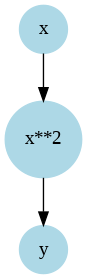

In [45]:
import torch
from graphviz import Digraph

# Define the computation
x = torch.tensor(3.0, requires_grad=True)  # Input variable
y = x**2  # Compute y = x^2

# Create a simplified visualization of the computational graph
def visualize_computational_graph(y, x):
    graph = Digraph(format="png")
    graph.node("x", "x", shape="circle", color="lightblue", style="filled")
    graph.node("square", "x**2", shape="circle", color="lightblue", style="filled")
    graph.node("y", "y", shape="circle", color="lightblue", style="filled")

    graph.edge("x", "square")
    graph.edge("square", "y")

    return graph

# Generate and visualize the graph
graph = visualize_computational_graph(y, x)
graph.render("computational_graph_y_equals_x_squared", cleanup=True)  # Save as PNG
Image('computational_graph_y_equals_x_squared.png')  # Display the image


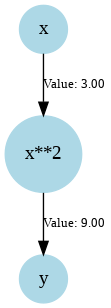

In [34]:
import torch
from graphviz import Digraph
from IPython.display import Image

# Define the computation
x = torch.tensor(3.0, requires_grad=True)  # Input variable
y = x**2  # Compute y = x^2

# Create a simplified visualization of the computational graph with values outside nodes
def visualize_computational_graph_with_values_outside(y, x):
    graph = Digraph(format="png")

    # Nodes
    graph.node("x", "x", shape="circle", color="lightblue", style="filled")
    graph.node("square", "x**2", shape="circle", color="lightblue", style="filled")
    graph.node("y", "y", shape="circle", color="lightblue", style="filled")


    # Edges with values outside nodes
    graph.edge("x", "square", label=f"Value: {x.item():.2f}", fontsize="10")
    graph.edge("square", "y", label=f"Value: {y.item():.2f}", fontsize="10")

    return graph

# Generate and visualize the graph
graph = visualize_computational_graph_with_values_outside(y, x)
graph.render("computational_graph_with_values_outside", format='png',cleanup=True)  # Save as PNG
#graph.view()  # View the rendered graph
Image('computational_graph_with_values_outside.png')  # Display the image


In [2]:
!pip install auto-diff

In [ ]:
git clone https://github.com/bgavran/autodiff.git
cd autodiff
pip install .

In [4]:
!git clone https://github.com/bgavran/autodiff.git

Cloning into 'autodiff'...
remote: Enumerating objects: 839, done.
remote: Total 839 (delta 0), reused 0 (delta 0), pack-reused 839 (from 1)
Receiving objects: 100% (839/839), 713.95 KiB | 6.43 MiB/s, done.
Resolving deltas: 100% (457/457), done.


In [8]:
%cd autodiff

/content/autodiff


In [9]:
!ls -ltr

total 28
-rwxr-xr-x 1 root root 6847 Dec  3 09:52 README.md
drwxr-xr-x 2 root root 4096 Dec  3 09:52 assets
drwxr-xr-x 4 root root 4096 Dec  3 09:52 autodiff
drwxr-xr-x 2 root root 4096 Dec  3 09:52 tests
-rw-r--r-- 1 root root  421 Dec  3 09:52 setup.py
drwxr-xr-x 2 root root 4096 Dec  3 09:52 examples


In [10]:
!pip install .

Processing /content/autodiff
  Preparing metadata (setup.py) ... done
  Created wheel for autodiff: filename=autodiff-0.1-py3-none-any.whl size=12533 sha256=dbc97697243a0d487a48856296a08829e9df77dc597e76dfecd168613c067dee
  Stored in directory: /tmp/pip-ephem-wheel-cache-kac3tq36/wheels/d6/0b/19/52f61b700b0f6b8b5e5fedbbce4e1f84dc9b761fdde008f244
Successfully built autodiff


In [47]:
import autodiff as ad

In [48]:
x = ad.Variable(3, name="x")
y = ad.Variable(4, name="y")
z = x * y + ad.Exp(x + 3)

In [49]:
z
z()
x_grad = ad.grad(z, [x])[0]
x_grad
x_grad()
z.plot_comp_graph()


Plotting...


In [53]:
z.plot_comp_graph()


Plotting...


In [58]:
z.plot_comp_graph(view=True, name="my_comp_graph")


Plotting...


In [60]:
!ls -ltr

total 68
-rwxr-xr-x 1 root root 6847 Dec  3 09:52 README.md
drwxr-xr-x 2 root root 4096 Dec  3 09:52 assets
drwxr-xr-x 2 root root 4096 Dec  3 09:52 tests
-rw-r--r-- 1 root root  421 Dec  3 09:52 setup.py
drwxr-xr-x 2 root root 4096 Dec  3 09:52 examples
drwxr-xr-x 4 root root 4096 Dec  3 09:53 build
drwxr-xr-x 2 root root 4096 Dec  3 09:53 autodiff.egg-info
drwxr-xr-x 5 root root 4096 Dec  3 09:54 autodiff
drwxr-xr-x 2 root root 4096 Dec  3 10:51 logs
-rw-r--r-- 1 root root  253 Dec  3 11:05 computational_graph_with_values
-rw-r--r-- 1 root root 8335 Dec  3 11:33 comp_graph.pdf
-rw-r--r-- 1 root root 8335 Dec  3 11:37 my_comp_graph.pdf


In [64]:
!pwd

/content/autodiff


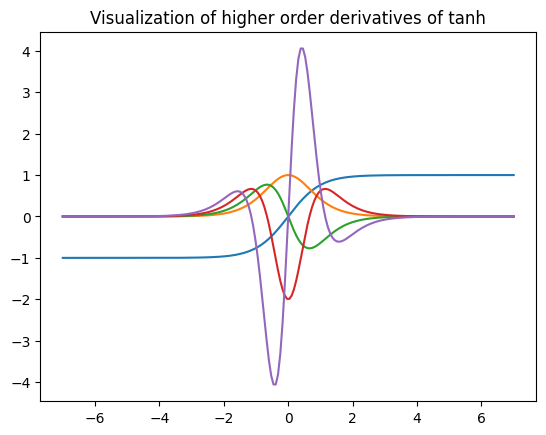

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import autodiff as ad

x = ad.Variable(np.linspace(-7, 7, 200), name="x")

fn = ad.Tanh


def diff_n_times(graph, wrt, n):
    for _ in range(n):
        graph = ad.grad(graph, [wrt])[0]
    return graph


plt.plot(x(), diff_n_times(fn(x), x, 0)(),
         x(), diff_n_times(fn(x), x, 1)(),
         x(), diff_n_times(fn(x), x, 2)(),
         x(), diff_n_times(fn(x), x, 3)(),
         x(), diff_n_times(fn(x), x, 4)())

plt.title("Visualization of higher order derivatives of tanh")
plt.show()
# ad.grad(fn(x), [x])[0].plot_comp_graph()